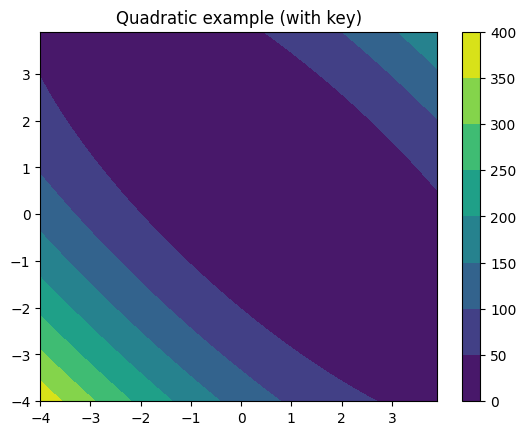

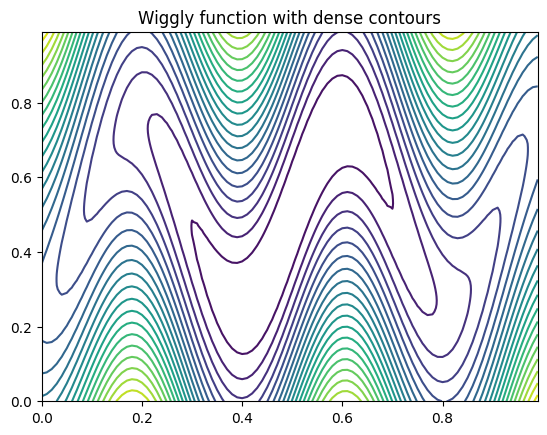

In [1]:
# -*- coding: utf-8 -*-
"""
Example of creating a contour plot 
Useful visualisation of functions of two variables, f(x,x)

@author: Tim Cootes
"""
import numpy as np
import matplotlib.pyplot as plt

# Simple quadratic function
def f_quad(x):
    c=np.array([0.75,0.5])
    A=[[5,4],[4,5]]
    return (x-c).T@A@(x-c)

# Wiggly function
def f_wiggly(x):
    return np.log(1+(x[0]-0.5)**2 + 2*(x[1]-0.5-0.25*np.sin(15*(x[0]-0.5)))**2)

# Create a grid of points
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
xx, yy = np.meshgrid(x, y)

# xx and yy are matrices containing x and y values of points

# Convert into a set of points by stacking two matrices
p=np.zeros([2,xx.shape[0],xx.shape[1]])
p[0,:,:]=xx[:,:]
p[1,:,:]=yy[:,:]

# Evaluate function at each point
z=np.apply_along_axis(f_quad,0,p)

cp=plt.contourf(x,y,z)
plt.colorbar(cp)
plt.title("Quadratic example (with key)")
plt.show()

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
xx, yy = np.meshgrid(x, y)
p=np.zeros([2,xx.shape[0],xx.shape[1]])
p[0,:,:]=xx[:,:]
p[1,:,:]=yy[:,:]

# Evaluate function at each point
z=np.apply_along_axis(f_wiggly,0,p)

n_levels=20
plt.contour(x,y,z,n_levels)
plt.title("Wiggly function with dense contours")
plt.show()

Number of iterations:  3
Result: ( 0.75 , 0.5000000000000001 )


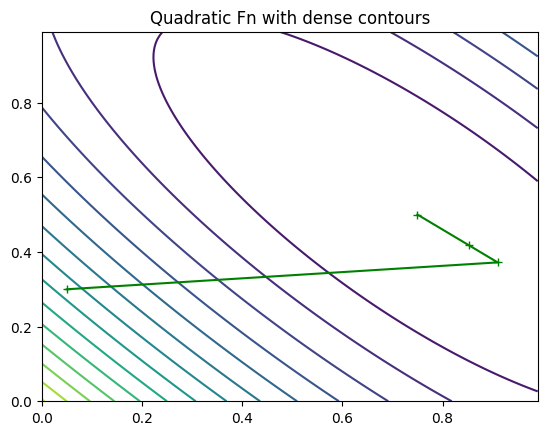

In [2]:
# -*- coding: utf-8 -*-
"""
Demonstrate optimising function of two variables.
Show path of optimisation steps on a graph.

@author: Tim Cootes
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Simple quadratic function
def f_quad(x):
    c=np.array([0.75,0.5])
    A=[[5,4],[4,5]]
    return (x-c).T@A@(x-c)
#    return (x[0]-0.75)**2 + 0.5*(x[1]-0.5)**2

# Wiggly function
def f_wiggly(x):
    return np.log(1+(x[0]-0.5)**2 + 2*(x[1]-0.5-0.25*np.sin(15*(x[0]-0.5)))**2)

# Display contour plot of f at all points (x[i],y[j])
def contour_plot(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.zeros([2,xx.shape[0],xx.shape[1]])
    p[0,:,:]=xx[:,:]
    p[1,:,:]=yy[:,:]
    fp = np.apply_along_axis(f,0,p)
    plt.contour(x,y,fp,n_levels)
    
    
# =============== Main code ============================
x0=np.array([0.05,0.3])
pt_list=[x0]

# This function will be called after each iteration
def record_result(x):
    pt_list.append(x)
    return False

#test_fn=f_wiggly
#fn_name="Wiggly function"
    
test_fn=f_quad
fn_name="Quadratic Fn"

res=minimize(test_fn,x0,method='Powell',callback=record_result) 

print("Number of iterations: ",res.nit)
print("Result: (",res.x[0],",",res.x[1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,test_fn,15)

# Plot the path of the optimisation as crosses on a line
for pt in pt_list:
    plt.plot(pt[0],pt[1],"+",color="green")
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  

    
plt.title(fn_name+" with dense contours")
plt.show()

Number of iterations:  65


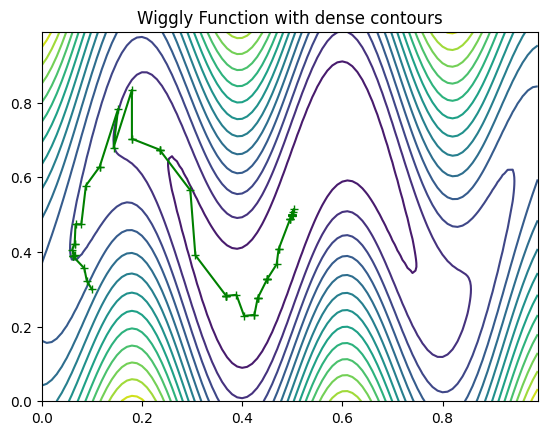

In [3]:
# -*- coding: utf-8 -*-
"""
Demonstrate optimising function of two variables using Nelder-Mead

Show path of optimisation steps on a graph.

@author: Tim Cootes
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Simple quadratic function
def f_quad(x):
    c=np.array([0.75,0.5])
    A=[[5,4],[4,5]]
    return (x-c).T@A@(x-c)

# Wiggly function
def f_wiggly(x):
    return np.log(1+(x[0]-0.5)**2 + 2*(x[1]-0.5-0.25*np.sin(15*(x[0]-0.5)))**2)

# Display contour plot of f at all points (x[i],y[j])
def contour_plot(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.zeros([2,xx.shape[0],xx.shape[1]])
    p[0,:,:]=xx[:,:]
    p[1,:,:]=yy[:,:]
    fp = np.apply_along_axis(f,0,p)
    plt.contour(x,y,fp,n_levels)
    
# =============== Main code ============================
x0=np.array([0.1,0.3])
pt_list=[x0]

# This function will be called after each iteration
def record_result(x):
    pt_list.append(x)
    return False

fn=f_wiggly
fn_name="Wiggly Function"
#fn=f_quad
#fn_name="Quadratic Fn"

res=minimize(fn,x0,method='Nelder-Mead',callback=record_result) 

print("Number of iterations: ",res.nit)

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,fn,15)

# Plot the path of the optimisation as crosses on a line
for pt in pt_list:
    plt.plot(pt[0],pt[1],"+",color="green")
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  
    
plt.title(fn_name+" with dense contours")
plt.show()

x-grad:  -8.59500000000013
y-grad:  -7.594999999999352
grad_fn:  [-8.6 -7.6]
Result: ( 0.7456030133485697 , 0.5043969866514303 )


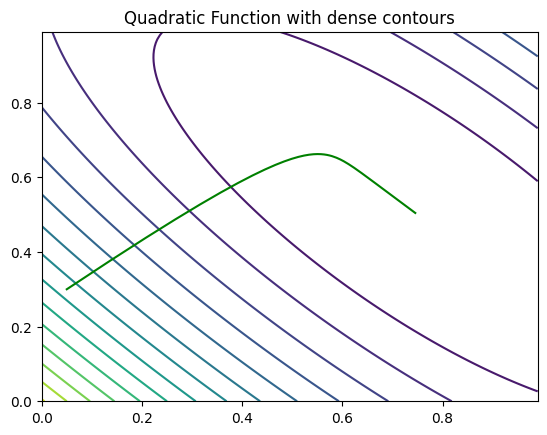

In [4]:
# -*- coding: utf-8 -*-
"""
Example of simple Steepest Descent algorithm

Show path of optimisation steps on a graph.

@author: Tim Cootes
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Simple quadratic function
def f_quad(x):
    c=np.array([0.75,0.5])
    A=np.array([[5,4],[4,5]])
    return (x-c).T@A@(x-c)

# Return gradient of f_quad at x
def f_quad_grad(x):
    c=np.array([0.75,0.5])
    A=np.array([[5,4],[4,5]])
    r= 2*A@(x-c)
    return r

# Display contour plot of f at all points (x[i],y[j])
def contour_plot(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.zeros([2,xx.shape[0],xx.shape[1]])
    p[0,:,:]=xx[:,:]
    p[1,:,:]=yy[:,:]
    fp = np.apply_along_axis(f,0,p)
    plt.contour(x,y,fp,n_levels)

def steepest_descent(f,grad_f,x0,alpha,g_tol,max_its):
    """Perform gradient descent from x0 until gradient below g_tol
       Assumes grad_f(x) returns gradient of f(x) at x
    """
    grad_mag=10
    n_its=0;
    x=x0
    pt_list=[x0]
    while ((grad_mag>g_tol) & (n_its<max_its)):
        g=grad_f(x)
        grad_mag=np.sqrt((g*g).sum())
        x=x-alpha*g
        pt_list.append(x)
        n_its=n_its+1
        
    return pt_list
    
# =============== Main code ============================
x0=np.array([0.05,0.3])

# Test the gradient
d=0.001
f0=f_quad(x0)
f1=f_quad(x0+[d,0])
f2=f_quad(x0+[0,d])
print("x-grad: ",(f1-f0)/d)
print("y-grad: ",(f2-f0)/d)
print("grad_fn: ",f_quad_grad(x0))

alpha=0.01     # Scale for step 
g_tol=0.001   # Stop when gradient smaller than this
max_its=200   # Run no more than this number of iterations
pt_list=steepest_descent(f_quad,f_quad_grad,x0,alpha,g_tol,max_its)

fn_name="Quadratic Function"

#print("Number of iterations: ",pt_list.size())
# Result stored in last element of pt_list
print("Result: (",pt_list[-1][0],",",pt_list[-1][1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,f_quad,15)

# Plot the path of the optimisation
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  
plt.title(fn_name+" with dense contours")
plt.show()

x-grad:  -8.59500000000013
y-grad:  -7.594999999999352
grad_fn:  [-8.6 -7.6]
Number of iterations:  2
Result: ( 0.75 , 0.5 )


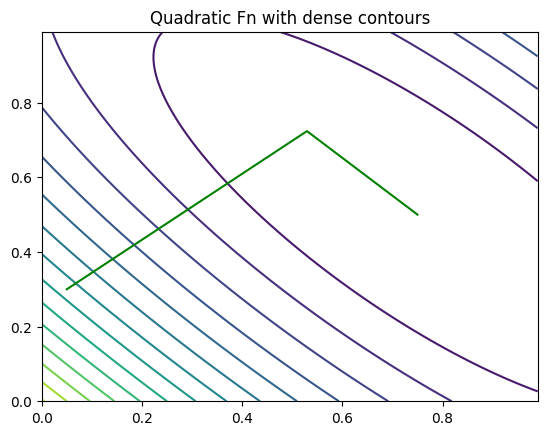

In [5]:
# -*- coding: utf-8 -*-
"""
Demonstrate optimising function of two variables using derivative information

Show path of optimisation steps on a graph.

@author: Tim Cootes
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Simple quadratic function
def f_quad(x):
    c=np.array([0.75,0.5])
    A=np.array([[5,4],[4,5]])
    return (x-c).T@A@(x-c)

# Return gradient of f_quad at x
def f_quad_grad(x):
    c=np.array([0.75,0.5])
    A=np.array([[5,4],[4,5]])
    r= 2*A@(x-c)
    return r

# Display contour plot of f at all points (x[i],y[j])
def contour_plot(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.zeros([2,xx.shape[0],xx.shape[1]])
    p[0,:,:]=xx[:,:]
    p[1,:,:]=yy[:,:]
    fp = np.apply_along_axis(f,0,p)
    plt.contour(x,y,fp,n_levels)
    
    
# =============== Main code ============================
x0=np.array([0.05,0.3])
pt_list=[x0]

# Test the gradient
d=0.001
f0=f_quad(x0)
f1=f_quad(x0+[d,0])
f2=f_quad(x0+[0,d])
print("x-grad: ",(f1-f0)/d)
print("y-grad: ",(f2-f0)/d)
print("grad_fn: ",f_quad_grad(x0))

# This function will be called after each iteration
def record_result(x):
    pt_list.append(x)
    return False

#test_fn=f_wiggly
#fn_name="Wiggly function"
    
test_fn=f_quad
test_fn_grad=f_quad_grad
fn_name="Quadratic Fn"

res=minimize(test_fn,x0,method='CG',jac=test_fn_grad,callback=record_result) 

print("Number of iterations: ",res.nit)
print("Result: (",res.x[0],",",res.x[1],")")

# Create a grid of points
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
contour_plot(x,y,test_fn,15)

# Plot the path of the optimisation
r=np.array(pt_list) # Convert list to array
plt.plot(r[:,0],r[:,1],color="green")  
plt.title(fn_name+" with dense contours")
plt.show()

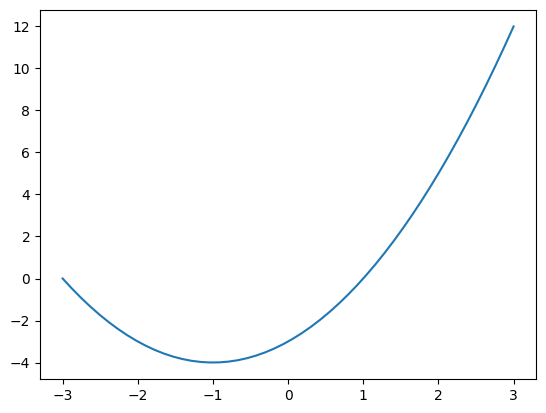

x_min:  -0.9999999851900002   f(x_min)= -4.0


In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Example of optimizing an analytic function

@author: tim
"""

from scipy.optimize import brent
import matplotlib.pyplot as plt
import numpy as np

# Define a quadratic function
def f1(x):
    return x*x + 2*x - 3

# Plot it
t=np.linspace(-3,3,50)
y=f1(t)

plt.plot(t,f1(t))
plt.show()

# Find x for minimum
x_min=brent(f1, brack=(-3,3))
print("x_min: ",x_min,"  f(x_min)=", f1(x_min))

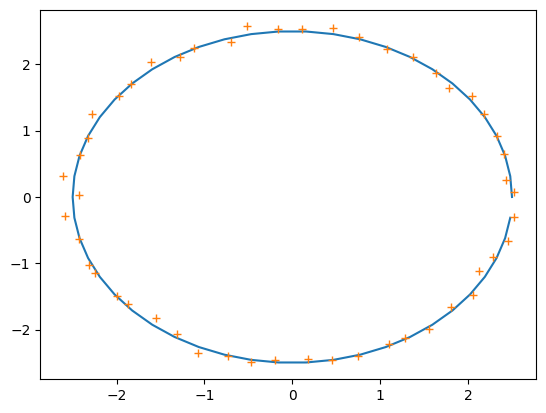

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Example of 1D fitting to data: Circle radius

@author: tim
"""

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

def make_circle1(n, r):
  """Return n points on circle centred at (0,0) with radius r"""
  
  t=np.linspace(0,2*np.pi,n,endpoint=False)
  p=np.zeros((2,n))
  p[0,:]=r*np.cos(t)
  p[1,:]=r*np.sin(t)
  return p


def add_noise(p, sd):
  """Add gaussian noise with standard deviation of sd to elements of p"""
  
  return p+np.random.normal(size=p.shape,scale=sd)


# Create points for circle (radius 2.5)
pts=make_circle1(50, 2.5)

plt.plot(pts[0],pts[1])

pts2=add_noise(pts,0.05)
plt.plot(pts2[0],pts2[1],"+")

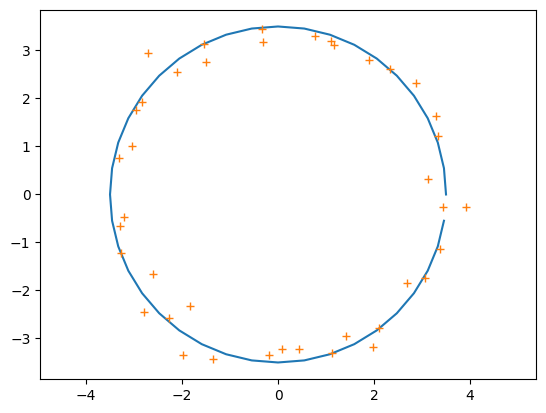

True radius=3.50  Estimated radius=3.44


In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Example of 1D fitting to data: Circle radius

@author: tim
"""

from scipy.optimize import brent
import numpy as np
import matplotlib.pyplot as plt

def make_circle1(n, r):
  """Return n points on circle centred at (0,0) with radius r"""
  
  t=np.linspace(0,2*np.pi,n,endpoint=False)
  p=np.zeros((2,n))
  p[0,:]=r*np.cos(t)
  p[1,:]=r*np.sin(t)
  return p


def add_noise(p, sd):
  """Add gaussian noise with standard deviation of sd to elements of p"""
  
  return p+np.random.normal(size=p.shape,scale=sd)

class CostFunction_circle1:
  """Cost function for circle fit (x=[r]). Initialised with points."""
  
  def __init__(self,pts):
    self.pts=pts
  
  def f(self,x):
      """Evaluate cost function fitting circle radius x"""
      r2=np.square(self.pts[0,:]) + np.square(self.pts[1,:])
      d=np.square(np.sqrt(r2)-x)
      return np.sum(d)

# Create points for circle (radius 2.5)
n_pts=40
true_r=3.5
pts=make_circle1(n_pts, true_r)

plt.plot(pts[0],pts[1])

pts2=add_noise(pts,0.25)
plt.plot(pts2[0],pts2[1],"+")
# Arrange that axis steps are same, so circle not squashed
plt.axis('equal')
plt.show()

# Set up cost function for circle fit
c1=CostFunction_circle1(pts2)
r1=brent(c1.f,brack=(0,10))
print("True radius={:0.2f}  Estimated radius={:0.2f}".format(true_r,r1))

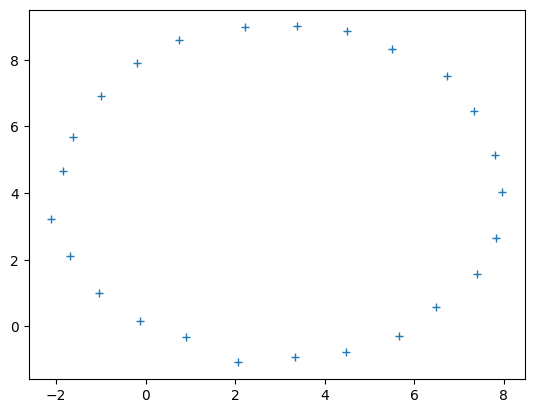

Best fit has centre ( 2.998078870837976 , 4.025348118175072 ) radius  5.006469533877208


In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Example of fitting a circle with arbitrary centre and radius to data.

@author: tim
"""

from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt


def make_circle3(n, x,y,r):
  """Return n points on circle centred at (x,y) with radius r"""
  
  t=np.linspace(0,2*np.pi,n,endpoint=False)
  p=np.zeros((2,n))
  p[0,:]=x+r*np.cos(t)
  p[1,:]=y+r*np.sin(t)
  return p


def add_noise(p, sd):
  """Add gaussian noise with standard deviation of sd to elements of p"""
  
  return p+np.random.normal(size=p.shape,scale=sd)

class CostFunction_circle3:
  """Cost function for circle fit (x=[cx,cy,r]. Initialised with points."""
  
  def __init__(self,pts):
    self.pts=pts
  
  def f(self,x):
      """Evaluate cost function fitting circle centre (x[0],x[1]) radius x[2]"""
      r2=np.square(self.pts[0,:]-x[0]) + np.square(self.pts[1,:]-x[1])
      d=np.square(np.sqrt(r2)-x[2])
      return np.sum(d)

# Generate points on a circle centre (3,4) radius 5
#Fitting a function of 3 parameters
pts=make_circle3(25, 3,4,5)
pts2=add_noise(pts,0.1)

plt.plot(pts2[0],pts2[1],"+")
plt.show()

# Set up a cost function to evaluate how well a circle fits to pts2
c3=CostFunction_circle3(pts2)

# Initialise a 3 element vector to zero (as a start)
x0=np.zeros(3)

# Use Powell's method to fit, starting at x
res=minimize(c3.f,x0,method='Powell') 

print("Best fit has centre (",res.x[0],",",res.x[1],") radius ",res.x[2])